In [3]:
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io, color, transform

import cv2
import numpy as np
import os
import pandas as pd
import re

from PIL import Image
from sklearn.preprocessing import MinMaxScaler

# READ DATA

In [4]:
data = pd.read_csv("dataset_without_hog.csv")

# CHECK CLASS IMBALANCE


In [5]:
class_counts = data['label'].value_counts()
print(class_counts)

label
0    2448
Name: count, dtype: int64


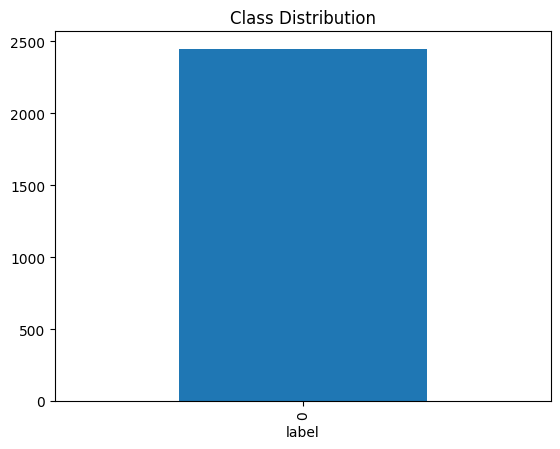

In [6]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cân bằng lớp
class_counts.plot(kind='bar', title='Class Distribution')
plt.show()


In [7]:
total_samples = len(data)
class_ratios = class_counts / total_samples
print(class_ratios)


label
0    1.0
Name: count, dtype: float64


# SPLIT DATA

In [8]:
x = data.drop("label", axis=1)
y = data['label']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [10]:
X_train[0]

array([ 99.,  99.,  99., ..., 133., 131., 118.])

# SCALE DATA

In [11]:
# Khởi tạo mô hình MinMaxScaler và fit trên tập huấn luyện
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Sử dụng mô hình đã fit để chuẩn hóa tập kiểm tra
X_test_scaled = scaler.transform(X_test)

# TRAIN

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Huấn luyện mô hình DecisionTree với các tham số cụ thể
DecisionTree_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

DecisionTree_model.fit(X_train_scaled, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = DecisionTree_model.predict(X_test_scaled)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


# EVALUATE

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính precision, recall, và f1-score cho từng lớp
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad']

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')

for i in range(len(class_names)):
    print(f"Class {class_names[i]}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")
    print()
    
# print onverall precision, recall, f1-score for each class
print(f"Overall:")
print(f"  Precision: {precision.mean():.4f}")
print(f"  Recall: {recall.mean():.4f}")
print(f"  F1-Score: {f1.mean():.4f}")


Accuracy: 1.0

Class Angry:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class Fear:


IndexError: index 1 is out of bounds for axis 0 with size 1

# SAVE MODEL

In [ ]:
import pickle

with open('dt_model_without_hog.pkl', 'wb') as f:
    pickle.dump(DecisionTree_model, f)

: 

In [ ]:
from joblib import dump
dump(DecisionTree_model, 'dt_model_without_hog.h5')

: 

# Tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Thiết lập các giá trị thử nghiệm cho các tham số
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier()

# Sử dụng GridSearchCV để tìm kiếm qua lưới tham số
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình trên tập kiểm tra
y_pred = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



: 